# Credit Card Fraud Detection
**Author:** San Winter  
**Date:** April 2025

Credit card fraud is a growing problem that leads to billions in losses each year. In this project, I will analyze a real-world dataset of credit card transactions to build machine learning models that can detect fraudulent activities.

### Goals:
- Explore and understand the dataset
- Handle class imbalance and preprocessing
- Train and evaluate models like Logistic Regression, XGBoost, and LightGBM
- Compare model performance using ROC-AUC and other metrics
- Identify the most important features contributing to fraud detection

## Dataset Source
This dataset is available on [Kaggle](https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud/data), provided by ULB (Université Libre de Bruxelles).

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, classification_report, confusion_matrix, roc_auc_score
from sklearn.linear_model import LogisticRegression



In [2]:
df = pd.read_csv('creditcard.csv')
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [4]:
df['Class'].value_counts()

,count
Class,
0,284315
1,492


As we can see, there are 284315 legitimate transactions and only 492 fraudulent ones. The target classes are not equally represented. Therefore, this dataset is imbalanced. Note that most machine learning models tend to predict only the majority class, in this case, non-fraudulent transactions because it yields high accuracy. However, this can lead to the rare fraud cases being overlooked, which poses a significant problem.

## Data Preprocessing

### Class Distribution

Let’s look at how imbalanced the dataset is. The 'Class' column indicates fraud (1) or not fraud (0) transactions.

Text(0.5, 1.0, 'Class Distribution (0 = Legit, 1 = Fraud)')

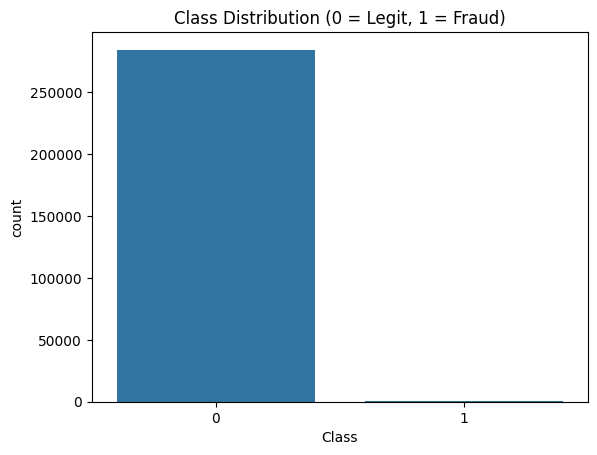

In [5]:
sns.countplot(x='Class', data=df)
plt.title("Class Distribution (0 = Legit, 1 = Fraud)")

## Handling Class Imbalance

In [6]:
df.corr()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.000000,1.173963e-01,-1.059333e-02,-4.196182e-01,-1.052602e-01,1.730721e-01,-6.301647e-02,8.471437e-02,-3.694943e-02,-8.660434e-03,...,4.473573e-02,1.440591e-01,5.114236e-02,-1.618187e-02,-2.330828e-01,-4.140710e-02,-5.134591e-03,-9.412688e-03,-0.010596,-0.012323
V1,0.117396,1.000000e+00,4.135835e-16,-1.227819e-15,-9.215150e-16,1.812612e-17,-6.506567e-16,-1.005191e-15,-2.433822e-16,-1.513678e-16,...,-2.457409e-16,-4.290944e-16,6.168652e-16,-4.425156e-17,-9.605737e-16,-1.581290e-17,1.198124e-16,2.083082e-15,-0.227709,-0.101347
V2,-0.010593,4.135835e-16,1.000000e+00,3.243764e-16,-1.121065e-15,5.157519e-16,2.787346e-16,2.055934e-16,-5.377041e-17,1.978488e-17,...,-8.480447e-17,1.526333e-16,1.634231e-16,1.247925e-17,-4.478846e-16,2.057310e-16,-4.966953e-16,-5.093836e-16,-0.531409,0.091289
V3,-0.419618,-1.227819e-15,3.243764e-16,1.000000e+00,4.711293e-16,-6.539009e-17,1.627627e-15,4.895305e-16,-1.268779e-15,5.568367e-16,...,5.706192e-17,-1.133902e-15,-4.983035e-16,2.686834e-19,-1.104734e-15,-1.238062e-16,1.045747e-15,9.775546e-16,-0.210880,-0.192961
V4,-0.105260,-9.215150e-16,-1.121065e-15,4.711293e-16,1.000000e+00,-1.719944e-15,-7.491959e-16,-4.104503e-16,5.697192e-16,6.923247e-16,...,-1.949553e-16,-6.276051e-17,9.164206e-17,1.584638e-16,6.070716e-16,-4.247268e-16,3.977061e-17,-2.761403e-18,0.098732,0.133447
V5,0.173072,1.812612e-17,5.157519e-16,-6.539009e-17,-1.719944e-15,1.000000e+00,2.408382e-16,2.715541e-16,7.437229e-16,7.391702e-16,...,-3.920976e-16,1.253751e-16,-8.428683e-18,-1.149255e-15,4.808532e-16,4.319541e-16,6.590482e-16,-5.613951e-18,-0.386356,-0.094974
V6,-0.063016,-6.506567e-16,2.787346e-16,1.627627e-15,-7.491959e-16,2.408382e-16,1.000000e+00,1.191668e-16,-1.104219e-16,4.131207e-16,...,5.833316e-17,-4.705235e-19,1.046712e-16,-1.071589e-15,4.562861e-16,-1.357067e-16,-4.452461e-16,2.594754e-16,0.215981,-0.043643
V7,0.084714,-1.005191e-15,2.055934e-16,4.895305e-16,-4.104503e-16,2.715541e-16,1.191668e-16,1.000000e+00,3.344412e-16,1.122501e-15,...,-2.027779e-16,-8.898922e-16,-4.387401e-16,7.434913e-18,-3.094082e-16,-9.657637e-16,-1.782106e-15,-2.776530e-16,0.397311,-0.187257
V8,-0.036949,-2.433822e-16,-5.377041e-17,-1.268779e-15,5.697192e-16,7.437229e-16,-1.104219e-16,3.344412e-16,1.000000e+00,4.356078e-16,...,3.892798e-16,2.026927e-16,6.377260e-17,-1.047097e-16,-4.653279e-16,-1.727276e-16,1.299943e-16,-6.200930e-16,-0.103079,0.019875
V9,-0.008660,-1.513678e-16,1.978488e-17,5.568367e-16,6.923247e-16,7.391702e-16,4.131207e-16,1.122501e-15,4.356078e-16,1.000000e+00,...,1.936953e-16,-7.071869e-16,-5.214137e-16,-1.430343e-16,6.757763e-16,-7.888853e-16,-6.709655e-17,1.110541e-15,-0.044246,-0.097733


### Feature Correlation

Visualize feature correlations to understand which variables are strongly related, which can guide feature selection and model interpretation.

Text(0.5, 1.0, 'Feature Correlation Heatmap')

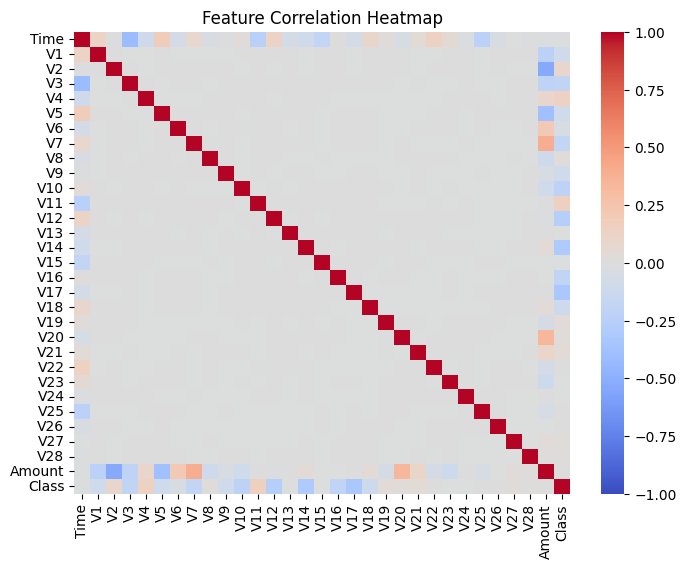

In [7]:
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), cmap='coolwarm', vmax=1.0, vmin=-1.0)
plt.title("Feature Correlation Heatmap")

### Let's take a look at the distributions of transaction amount

Text(0.5, 1.0, 'Transaction Amount by Class')

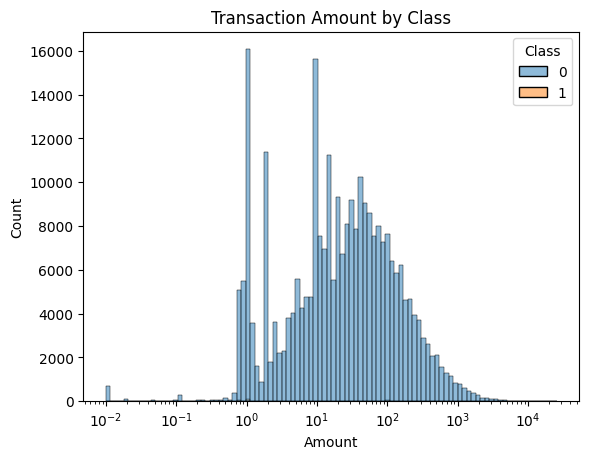

In [8]:
sns.histplot(data=df, x='Amount', hue='Class', bins=100, log_scale=True)
plt.title("Transaction Amount by Class")

## Model Training

In [9]:
df['Amount'] = StandardScaler().fit_transform(df[['Amount']]) # standardize the 'Amount' feature

In [10]:
X = df.drop(['Class', 'Time'], axis=1)
y = df['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


## Handling Class Imbalance with SMOTE

In [11]:
from imblearn.over_sampling import SMOTE
from collections import Counter

print("Before SMOTE:", Counter(y_train))

smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

print("After SMOTE:", Counter(y_train))

Before SMOTE: Counter({0: 227451, 1: 394})
After SMOTE: Counter({0: 227451, 1: 227451})


### Logistic Regression

In [12]:
# train a logistic regression model
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [13]:
# predict y
y_pred = lr.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [14]:
# Evaluation
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(roc_auc_score(y_test, y_pred))

[[55355  1509]
 [    8    90]]
              precision    recall  f1-score   support

           0       1.00      0.97      0.99     56864
           1       0.06      0.92      0.11        98

    accuracy                           0.97     56962
   macro avg       0.53      0.95      0.55     56962
weighted avg       1.00      0.97      0.98     56962

0.9459151731880147


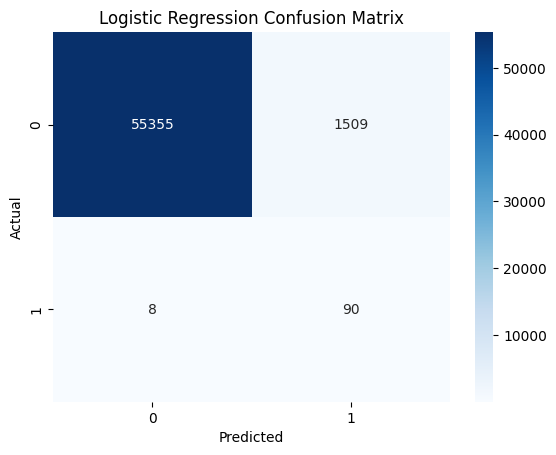

In [15]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Logistic Regression Confusion Matrix")
plt.show()

The roc_auc_score is a meric used to evaluate the performance of classification models, especially binary classifiers, e.g. fraud vs not fraud in this case.
ROC = Receive Operating Characteristic:
It's a curve that shows the trade-off between the true positive rate (TPR) and false positive rate (FPR) at different classification thresholds.
* True Positive Rate (TPR) = Sensitivity = How many actual frauds you correctly caught.
* False Positive Rate (FPR) = How many legit transactions you wrongly flagged as fraud.

AUC = Area Under the Curve:
The ROC AUC score is the area under that curve, a single number between 0 and 1:

| AUC Score | Meaning             |
|:----------|:--------------------|
| 1.0       | Perfect classifier  |
| 0.9+      | Excellent           |
| 0.8+      | Good                |
| 0.7+      | Fair                |
| 0.5       | Random guess        |
| < 0.5     | Worse than random   |



### As we can see that the AUC score for Logistic regression is 0.95, which is very good. However, we would like to compare this model with others to determine which one performs best. So, let's try XGBoost.

### XGBoost

In [16]:
from xgboost import XGBClassifier
xgbm = XGBClassifier(scale_pos_weight=99, use_label_encoder=False, eval_metric='logloss')
xgbm.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [19:10:52] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [17]:
y_pred = xgbm.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(roc_auc_score(y_test, y_pred))

[[56780    84]
 [   12    86]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.51      0.88      0.64        98

    accuracy                           1.00     56962
   macro avg       0.75      0.94      0.82     56962
weighted avg       1.00      1.00      1.00     56962

0.9380369058146611


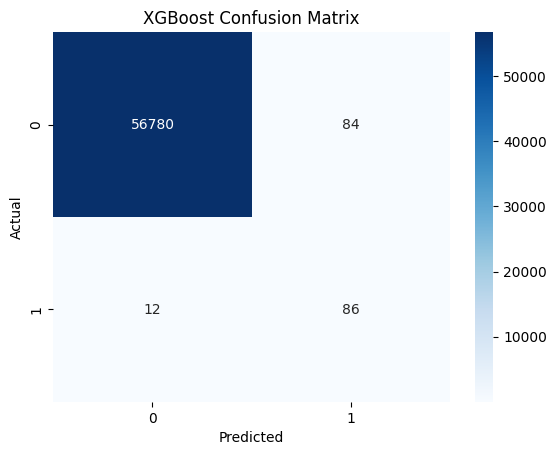

In [18]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("XGBoost Confusion Matrix")
plt.show()

XGBoost model is also pretty good, with an accuracy of 0.94. Let's try LightGBM.

### LightGBM

In [19]:
import lightgbm as lgb
lgbm = lgb.LGBMClassifier()
lgbm.fit(X_train, y_train)

[LightGBM] [Info] Number of positive: 227451, number of negative: 227451
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.148591 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7395
[LightGBM] [Info] Number of data points in the train set: 454902, number of used features: 29
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


LGBMClassifier()

In [20]:
y_pred = lgbm.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(roc_auc_score(y_test, y_pred))

[[56762   102]
 [   14    84]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.45      0.86      0.59        98

    accuracy                           1.00     56962
   macro avg       0.73      0.93      0.80     56962
weighted avg       1.00      1.00      1.00     56962

0.9276745518128467


LightGBM also gives a high accuracy score of 0.92.

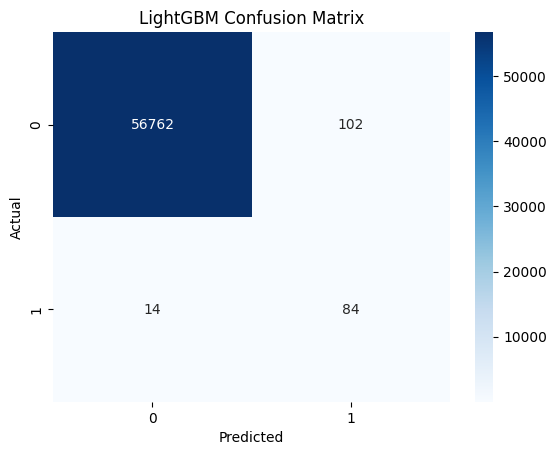

In [21]:
# visualize the confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("LightGBM Confusion Matrix")
plt.show()

## Model Evaluation

## Evaluating these three classification models using ROC Curve.
ROC Curve = Receiver Operating Characteristic Curve, is best used to handle imbalanced data like this, such as in fraud detection.

The ROC Curve plots:
* True Positive Rate (TPR) = Recall = Sensitivity
* False Positive Rate (FPR) = 1 - Specificity
against various threshold values for classification.

On the ROC plot:
* The Y-axis is TPR (how many frauds you caught)
* The X-axis is FPR (how many legit transactions you mislabeled as fraud)
* A model that randomly guesses would follow the diagonal line
* The closer your curve is to the top-left corner, the better your model is

AUC Score:
* 1.0 = perfect model
* 0.9–1.0 = excellent
* 0.8–0.9 = good
* 0.7–0.8 = fair
* 0.5 = random guessing
* < 0.5 = worse than random

## Let's find the predicted probabilities from these three models for the positive class 1/fraud.

In [22]:
y_proba_lr = lr.predict_proba(X_test)[:, 1]
y_proba_xgbm = xgbm.predict_proba(X_test)[:, 1]
y_proba_lgbm = lgbm.predict_proba(X_test)[:, 1]

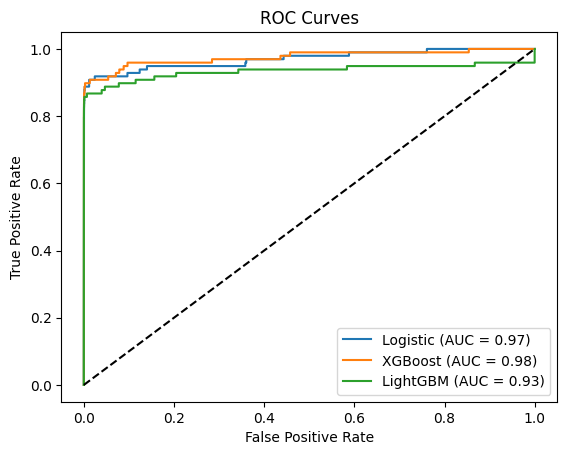

In [23]:
from sklearn.metrics import roc_curve, auc

fpr1, tpr1, _ = roc_curve(y_test, y_proba_lr)
fpr2, tpr2, _ = roc_curve(y_test, y_proba_xgbm)
fpr3, tpr3, _ = roc_curve(y_test, y_proba_lgbm)

plt.plot(fpr1, tpr1, label="Logistic (AUC = {:.2f})".format(auc(fpr1, tpr1)))
plt.plot(fpr2, tpr2, label="XGBoost (AUC = {:.2f})".format(auc(fpr2, tpr2)))
plt.plot(fpr3, tpr3, label="LightGBM (AUC = {:.2f})".format(auc(fpr3, tpr3)))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves")
plt.legend()

## Feature Importance

## Let's make a side-by-side comparison of feature importance across:
* Logistic Regression (coefficients)
* XGBoost (gain-based importance)
* LightGBM (gain-based importance)

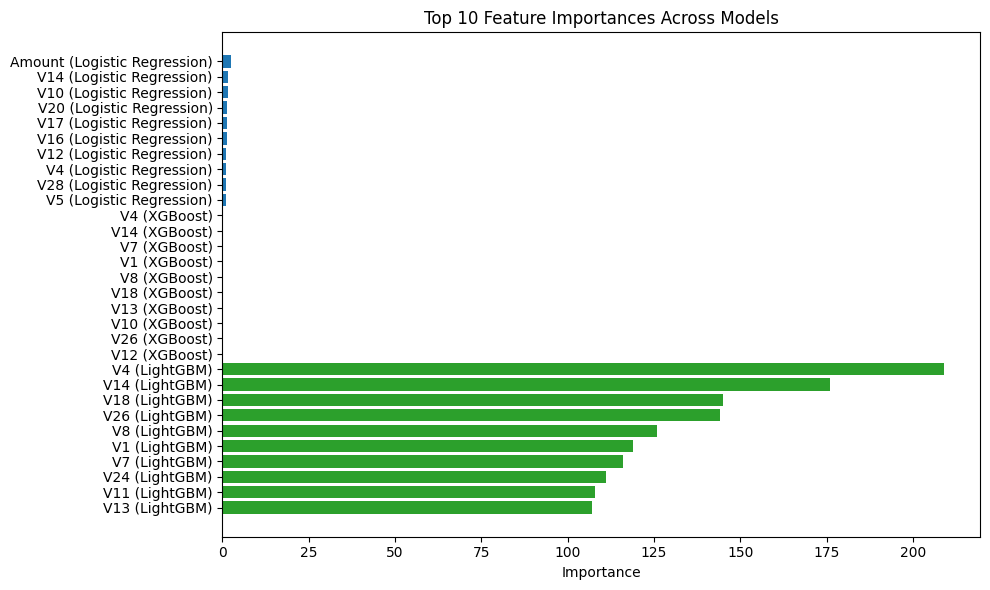

In [24]:
# Logistic Regression
lr_importance = pd.Series(lr.coef_[0], index=X_train.columns)
lr_importance = lr_importance.abs().sort_values(ascending=False).head(10)
lr_df = pd.DataFrame({'Feature': lr_importance.index, 'Importance': lr_importance.values, 'Model': 'Logistic Regression'})

# XGBoost
xgbm_importance = pd.Series(xgbm.feature_importances_, index=X_train.columns)
xgbm_top = xgbm_importance.sort_values(ascending=False).head(10)
xgbm_df = pd.DataFrame({'Feature': xgbm_top.index, 'Importance': xgbm_top.values, 'Model': 'XGBoost'})

# LightGBM
lgbm_importance = pd.Series(lgbm.feature_importances_, index=X_train.columns)
lgbm_top = lgbm_importance.sort_values(ascending=False).head(10)
lgbm_df = pd.DataFrame({'Feature': lgbm_top.index, 'Importance': lgbm_top.values, 'Model': 'LightGBM'})

# Combine All
importance_df = pd.concat([lr_df, xgbm_df, lgbm_df])


plt.figure(figsize=(10, 6))
for model in importance_df['Model'].unique():
    subset = importance_df[importance_df['Model'] == model]
    plt.barh(subset['Feature'] + f" ({model})", subset['Importance'])

plt.xlabel("Importance")
plt.title("Top 10 Feature Importances Across Models")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

## Conclusion
In this project, I tackled the challenge of credit card fraud detection using machine learning. The dataset presented a classic imbalanced classification problem, where fraudulent transactions were vastly outnumbered by legitimate ones. To address this, I applied SMOTE to generate synthetic samples for the minority class and balance the training data.

I trained and evaluated three different models: Logistic Regression, XGBoost, and LightGBM, using metrics like precision, recall, F1-score, and ROC-AUC. These metrics provided a more meaningful view of model performance than accuracy, especially in the context of imbalanced data.

Among the models, the Logistic Regression showed the best performance based on ROC-AUC and F1-score. Feature importance analysis also revealed which variables had the strongest predictive power in detecting fraudulent transactions.

This project was a great practice in training, evaluating, and interpreting models for rare-event detection. Future work could involve deploying the model, experimenting with time-based fraud patterns, or exploring streaming fraud detection methods.

**Thanks for reading!**